In [21]:
import math
import graphviz
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from IPython.display import SVG
from sklearn.metrics import classification_report 


df = pd.read_excel('../data/hawaii-5-11-22.xls', sheet_name='Complete')

In [2]:
primaries = df[[
    # "ISLAND",
    "VOLCANO",
    # Major Elements
    "SIO2(WT%)", 
    "AL2O3(WT%)",
    "TIO2(WT%)",
    "FeO*", 
    "CAO(WT%)", 
    "MGO(WT%)", 
    "K2O(WT%)", 
    "NA2O(WT%)",
    # Minor Elements
    # "P2O5(WT%)",
    # "MNO(WT%)", 
]]
primaries = primaries.dropna()
print('Number of samples:', len(primaries.index))
primaries.head()

Number of samples: 2909


,VOLCANO,SIO2(WT%),AL2O3(WT%),TIO2(WT%),FeO*,CAO(WT%),MGO(WT%),K2O(WT%),NA2O(WT%)
0,1.0,49.09,9.79,1.68,10.855632,8.09,18.04,0.33,1.65
1,1.0,51.35,13.70,2.22,11.167376,10.52,6.46,0.62,2.46
2,1.0,51.40,13.86,2.22,10.962266,10.56,6.38,0.62,2.42
3,1.0,51.45,13.83,2.19,10.866694,10.58,6.50,0.57,2.46
4,1.0,51.00,14.15,2.19,10.571404,10.56,6.16,0.60,2.47


C:\Users\miroi\AppData\Local\Temp\ipykernel_25852\421058711.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  classifier.fit(data[0:][:train_size], shuffled['VOLCANO'][:train_size])


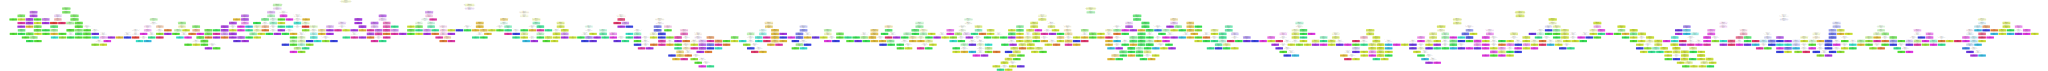

In [62]:
classifier = tree.DecisionTreeClassifier()
# shuffled = primaries.drop(['VOLCANO', 'ISLAND'], axis = 1).sample(frac=1)
shuffled = primaries.sample(frac = 1)

# Split data into training and test sets
train_size = math.floor(len(shuffled) * 0.8)
train = shuffled[:train_size]
test_count = len(shuffled) - train_size

data = shuffled.drop(['VOLCANO'], axis = 1)
classifier.fit(data[0:][:train_size], shuffled['VOLCANO'][:train_size])

# plt.figure(figsize=(40,20))
# tree.plot_tree(classifier, fontsize=10)

dot_data = tree.export_graphviz(
    classifier, 
    out_file=None,
    feature_names=primaries.columns[1:],
    filled=True,
    rounded=True,
    class_names=[str(x) for x in primaries['VOLCANO'].unique()],
)
graph = graphviz.Source(dot_data)
SVG(graph.pipe(format='svg'))

In [63]:
print(classification_report(
    shuffled[-test_count:]['VOLCANO'],
    classifier.predict(data[0:][-test_count:]),
    target_names = [str(x) for x in primaries['VOLCANO'].unique()]
))

              precision    recall  f1-score   support

         1.0       0.55      0.40      0.46        15
         2.0       0.76      0.71      0.73        41
         3.0       0.85      0.83      0.84       167
         4.0       0.45      0.31      0.37        16
         5.0       0.77      0.81      0.78        77
         0.0       0.63      0.74      0.68        65
         8.0       0.56      0.54      0.55        28
        14.0       0.14      0.14      0.14         7
        16.0       0.80      0.40      0.53        10
         9.0       0.00      0.00      0.00         1
         6.0       0.59      0.89      0.71        27
         7.0       0.43      0.60      0.50         5
        10.0       0.71      0.70      0.70        56
        11.0       0.57      0.54      0.56        37
        15.0       0.56      0.31      0.40        16
        12.0       0.50      0.67      0.57         9
        13.0       1.00      0.60      0.75         5

    accuracy              

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
